# py-utils guide

First let's import py_utils

In [647]:
import py_utils

Running the function below gives us the ability to hide code cells in jupyter notebook. <br>
This can be helpful when presenting.

In [648]:
py_utils.hide_code_cells()

## Model Building

To explore how to use the model utils let's quickly make a test model. <br>
Firstly, import some more packages.

In [649]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification, load_iris

Let's make a fake numeric dataset for the purpose of our examples.

We'll do this by using scikit-learn's helpful `make_classification` function.

<mark>You can 'unpack' arguments into a function via a dictionary using the `**` notation (see below).</mark>

In [650]:
make_classification_dict = {'n_samples': 100000, 'n_features': 50}

sample_data =  make_classification(**make_classification_dict)

Let's look at our X:

In [651]:
X = pd.DataFrame(sample_data[0]).fillna(np.median)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.819823,0.097565,-1.757625,1.227868,0.131023,0.426952,-0.901286,-0.146374,0.144019,-1.730063,...,0.608063,0.373808,0.212106,-0.480824,0.306803,0.541224,1.113348,0.371633,-1.794812,-0.819101
1,0.522197,0.151296,1.289466,-1.160126,0.129245,0.599367,0.100735,-0.569687,-1.026696,1.189401,...,-0.801043,0.519837,1.985378,0.870569,-0.361663,0.991291,-0.187126,-0.725366,0.151034,-1.352145
2,-1.997706,-0.353547,0.878651,-0.784361,-1.102551,0.035339,0.530357,-0.415905,0.624581,-1.543561,...,-1.413638,-1.951667,-0.192065,-0.166177,-0.111217,-0.077342,-2.155042,0.265217,0.731313,2.069130
3,0.511898,0.243341,2.651493,-0.827056,0.114937,-0.061088,0.278560,0.504284,0.840692,-0.881697,...,-2.079124,0.289213,0.209501,-0.375945,0.460960,0.409314,0.044036,-2.207479,0.359103,0.175793
4,0.591561,-1.614747,-0.991083,-0.850550,-0.053781,0.204666,-0.202397,-0.203307,0.473752,1.008277,...,0.295646,0.734089,1.383470,-0.339204,1.356450,0.588089,0.065331,-1.344490,-1.292817,0.478965


Let's look at our y: <br>
<mark>You can continue code onto the next line with `\` (see below)</mark>

In [652]:
y = pd.Series(sample_data[1])\
.to_frame()
y.head()

,0
0,1
1,1
2,0
3,0
4,1


In [653]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

Now let's say we want to apply a logistic regression model.

In [654]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [655]:
logreg.score(X_test, y_test)

0.90484

### Model Saving

In [656]:
mkdir Models

Let's save the model, the function assumes that we have a 'Models' subfolder so we have one created here. <br>
We need to define the following things for this function:
* `model_name` = the root name of the model we want to save.
* `model_var` = the model variable we want to save.
* `subfolder` = optional subfolder we want to use, we don't need it here so let's leave it as an empty string.
* `wd` = working directory, the main working directory of our project.

In [657]:
py_utils.dump_diff_model(model_name='my_model', model_var=logreg, subfolder='', wd = os.getcwd())

Let's see this file, which is saved below.

In [658]:
[x for x in os.listdir(os.path.join(os.getcwd(), 'Models')) if x.endswith('.joblib')]

['my_model_2019-07-22 23:50:11.724130.joblib']

Now let's try and save it again and check the output.

In [659]:
py_utils.dump_diff_model(model_name='my_model', model_var=logreg, subfolder='', wd = os.getcwd())

In [660]:
[x for x in os.listdir(os.path.join(os.getcwd(), 'Models')) if x.endswith('.joblib')]

['my_model_2019-07-22 23:50:11.724130.joblib']

We can see that nothing has saved! <br>
This is because we are trying to save the same model twice.

Now let's try and save a different model with the same name 'my_model'. <br>
Let's say we want to change Logistic Regression solver.

In [661]:
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [662]:
logreg.score(X_test, y_test)

0.90484

We've now changed the solver from 'lbfgs' to 'saga', now let's try and save this different model.

In [663]:
py_utils.dump_diff_model(model_name='my_model', model_var=logreg, subfolder='', wd = os.getcwd())

In [664]:
[x for x in os.listdir(os.path.join(os.getcwd(), 'Models')) if x.endswith('.joblib')]

['my_model_2019-07-22 23:50:11.724130.joblib',
 'my_model_2019-07-22 23:50:14.303373.joblib']

We can see that this new model has been saved. <br>
This is because it is different from the most recent version of that model as defined by its timestamp.

Let's look at the docstring for this function.

In [665]:
help(py_utils.dump_diff_model)

Help on function dump_diff_model in module py_utils:

dump_diff_model(model_name, model_var, wd, subfolder='')
    This function will dump your model with a unique timestamp associated with it.
    First it will check if the most recent model is the same as the one you're trying to dump, 
    if this is case then the funciton will do nothing.
    
    Example:
    Let's say you want to dump a model called log_reg. You want to dump this file with the name 'master_model'.
    
    py_utils.dump_diff_model(name = 'master_model', log_reg, wd = "/Users/Daniel/Desktop/Projects/First_Project/")
    
    Args:
    model_mame (str): the name you want to give the model you're dumping.
    model_var: the actual model itself.
    wd (str): your working directory, the function will look in the /Models subfolder of this working directory.



### Model Loading

Now we know how to save models, let's see how we load them. <br>
First let's import out necessary package.

In [666]:
import joblib

Let's use another one of these util functions: most_recent_model() <br>
Very simply, it returns the path of the most recent model in a directory (based on the timestamp).

Let's see what we define for this function:
* `model_name` = the root name of the model we want to save.
* `wd` = working directory, the main working directory of our project.
* `subfolder` = optional subfolder we want to use, we don't need it here so let's leave it as an empty string.

We get more help by inspecting the docstring for this function below.

In [667]:
help(py_utils.most_recent_model)

Help on function most_recent_model in module py_utils:

most_recent_model(model_name, wd, subfolder)
    This function finds the name of the most recent model from the file directory.
    It's a companion function to the dunp_diff_model function.
    
    Example:
    If you had a model called 'log_reg' that was saved at this timestamp: '2019-05-21 12/04/54.815294'.
    The filename would be 'log_reg 2019-06-21 12/04/54.875304.joblib' and the root would be 'log_reg'.
    
    log_reg = load(py_utils.most_recent_model(model_name = 'log_reg', wd = "/Users/Daniel/Desktop/Projects/First_Project/"))
    
    Args:
    model_name (str): the name of the model you want to find the most recent version of.
    wd (str): your working directory, the function will look in the /Models subfolder of this working directory
    
    Returns:
    most_recent_model_path (str): the filepath of your most recent model



In [668]:
model_to_load = py_utils.most_recent_model(model_name = 'my_model', wd = os.getcwd(), subfolder='')
model_to_load

'/Users/Daniel/Desktop/GitHub_Repos/ml-utils/Models/my_model_2019-07-22 23:50:14.303373.joblib'

Here we see the path above. <br>
Now let's import this model.

In [669]:
logreg = joblib.load(model_to_load)

In [670]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

We see above that we successfully imported this model.

### Sensitivity Analysis

Now let's go through the sensitivity analysis function, this involves: <br>
"... the study of how the uncertainty in the output of a mathematical model or system (numerical or otherwise) can be divided and allocated to different sources of uncertainty in its inputs." [Wikipedia](https://en.wikipedia.org/wiki/Sensitivity_analysis).

Let's do sensitivity analysis on the log_reg model, this involves changing each feature by multiple of itself, then scoring the model. <br>
The docstring is below.

In [671]:
help(py_utils.sensitivity_analysis)

Help on function sensitivity_analysis in module py_utils:

sensitivity_analysis(sens_voi, X_test, y_test, model, multiplier=1.1, scoring_func=<function roc_auc_score at 0x1a209da158>)
    This function runs a sensitivity analysis by taking a model then modifying its feature vector in a univariate fashion.
    Following this, a scoring function is applied.
    When all features are ran through then a summary dataframe is returned.
    
    Example:
    Let's say you have a model called log_reg, you want to do sensitivity analysis on all features in a feature vector called X_train.
    You also want to multiply each feature by 1.1 and use roc_auc as your scoring metric.
    
    py_utils.sensitivity_analysis(
        sens_voi = X_train.columns, X_test = X_test, y_test = y_test, model = log_reg, multiplier = 1.1,  scoring_func = sklearn.metrics.roc_auc_score
        )
        
    Args:
    sens_voi (list): Sensitivitiy analysis features of interest.
    X_test (pd.DataFrame): the feature

The sensitvitiy analysis returns a DataFrame which has a summary of the analysis, we can also change our scoring function, but here I will roc_auc as this was the metric used for training.

In [672]:
sens_example = py_utils.sensitivity_analysis(X_train, X_test, y_test, logreg, 1.5, sklearn.metrics.roc_auc_score)
sens_example

,Feature multiplied by 1.5,Sensitivity roc_auc_score
0,0,0.964411
1,1,0.964410
2,2,0.964405
3,3,0.964412
4,4,0.964405
5,5,0.964409
6,6,0.964396
7,7,0.964411
8,8,0.964410
9,9,0.964409


We can see above that the scores are quite stable. <br>
A distribution is available below.

[Text(0.5, 1.0, 'Sensitivity distribution')]

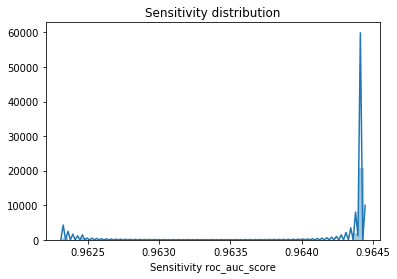

In [673]:
sns.distplot(sens_example.iloc[:,-1]).set(title = 'Sensitivity distribution')